# 0.) Import the Credit Card Fraud Data From CCLE

In [9]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [10]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [11]:
df = pd.read_csv("/content/gdrive/MyDrive/441winter/fraudTest.csv")

In [12]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [13]:
df_select = df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]

In [16]:
features = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]
features['trans_date_trans_time'] = pd.to_datetime(features['trans_date_trans_time'])
features['trans_date_trans_time'] = [i.hour for i in features['trans_date_trans_time']]

dummies = pd.get_dummies(features['category'])
X = pd.concat([dummies, features[['city_pop','amt','trans_date_trans_time']]], axis =1)
y = features['is_fraud']

<ipython-input-16-ff9bf9489630>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trans_date_trans_time'] = pd.to_datetime(features['trans_date_trans_time'])
<ipython-input-16-ff9bf9489630>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trans_date_trans_time'] = [i.hour for i in features['trans_date_trans_time']]


In [17]:
#df["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
#df_select['time_var'] = [i.second for i in df_select["trans_date_trans_time"]]

#X= pd.get_dummies(df_select,["category"]).drop(["trans_date_trans_time","is_fraud"],axis=1)
#y= df["is_fraud"]

#dummies = pd.get_dummies(df_select["category"])
#X = pd.concat([dummies,df_select[["amt","city_pop","time_var"]]],axis=1)
#y = df_select["is_fraud"]

In [18]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,city_pop,amt,trans_date_trans_time
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,333497,2.86,12
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,302,29.84,12
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,34496,41.28,12
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,54767,60.05,12
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1126,3.19,12


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,city_pop,amt,trans_date_trans_time
281741,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3263,63.25,18
82832,0,0,0,0,0,0,0,0,0,0,0,0,1,0,344,2.65,6
318860,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2856,39.19,12
250802,0,0,0,0,1,0,0,0,0,0,0,0,0,0,836,95.89,2
411289,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1334,79.93,7


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [22]:
# Oversample the minority class
ros = RandomOverSampler(sampling_strategy='minority')
over_X, over_y = ros.fit_resample(X_train, y_train)
df_over = pd.DataFrame(data=np.column_stack([over_X, over_y]))
over_X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,city_pop,amt,trans_date_trans_time
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3263,63.25,18
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,344,2.65,6
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2856,39.19,12
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,836,95.89,2
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1334,79.93,7


In [43]:
# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy='majority')
under_X, under_y = rus.fit_resample(X_train, y_train)
df_under = pd.DataFrame(data=np.column_stack([under_X, under_y]))

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# transform the dataset
oversample = SMOTE()
smote_X,smote_y = oversample.fit_resample(X_train,y_train)
smote_X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,city_pop,amt,trans_date_trans_time
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3263,63.25,18
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,344,2.65,6
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2856,39.19,12
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,836,95.89,2
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1334,79.93,7


In [48]:
type(smote_y)

pandas.core.series.Series

# 3.) Train three logistic regression models 

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X,y)

In [27]:
over_log = LogisticRegression().fit(over_X,over_y)
under_log = LogisticRegression().fit(under_X,under_y)
smote_log = LogisticRegression().fit(smote_X,smote_y)

# 4.) Test the three models

In [28]:
over_y = over_log.predict(X_test)
under_y = under_log.predict(X_test)
smote_y = smote_log.predict(X_test)

In [30]:
from sklearn import metrics

over_matrix = metrics.confusion_matrix(y_test, over_y)
print(over_matrix,'over_matrix')

under_matrix = metrics.confusion_matrix(y_test, under_y)
print(under_matrix,'under_matrix')

smote_matrix = metrics.confusion_matrix(y_test, smote_y)
print(smote_matrix,'smote_matrix')


[[134933  31180]
 [   139    464]] over_matrix
[[134631  31482]
 [   139    464]] under_matrix
[[136691  29422]
 [   147    456]] smote_matrix


# 5.) Which performed best in Out of Sample metrics?

In [34]:
specificity_over = over_matrix[1,1]/(over_matrix[1,0]+over_matrix[1,1])
specificity_over

0.7694859038142621

In [35]:
specificity_under = under_matrix[1,1]/(under_matrix[1,0]+under_matrix[1,1])
specificity_under

0.7694859038142621

In [36]:
specificity_smote = smote_matrix[1,1]/(smote_matrix[1,0]+smote_matrix[1,1])
specificity_smote

0.7562189054726368

In [37]:
print('According to the specificity calculated, undersampling model and oversampling model perform better than SMOTE.')

According to the specificity calculated, undersampling model and oversampling model perform better than SMOTE.


# 6.) Pick two features and plot the two classes before and after SMOTE.

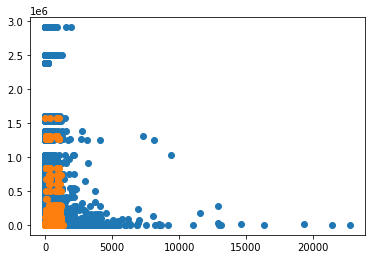

In [38]:
OG_data_temp = pd.concat([X_train, y_train], axis=1)
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 0]['amt'], OG_data_temp[OG_data_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 1]['amt'], OG_data_temp[OG_data_temp['is_fraud'] == 1]['city_pop'])
plt.show()

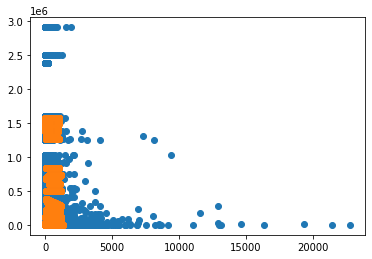

In [51]:
df_smote = pd.concat([smote_X,smote_y], axis=1)
plt.scatter(df_smote[df_smote['is_fraud'] == 0]['amt'], df_smote[df_smote['is_fraud'] == 0]['city_pop'])
plt.scatter(df_smote[df_smote['is_fraud'] == 1]['amt'], df_smote[df_smote['is_fraud'] == 1]['city_pop'])
plt.show()